---
# Categorical Feature Selection

---

### There are two popular feature selection techniques that can be used for categorical input data and a categorical (class) target variable.

### **1. Chi-Squared Statitics**
### **2. Mututla information Statitics**

---
---
<h1 align='center'>Chi-Squared Feature Selection</h1>

In [16]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# load dataset
# create function for load dataset
def load_dataset(filename):
    # load dataset as a pandas fataframe
    data=pd.read_csv(filename,header=None)
    
    # retrieve numpy  array
    dataset=data.values
    
    # Split into Input(X) and output(y) variables
    X=dataset[:,:-1]
    y=dataset[:,-1]
    
    # format all fileds as string
    X=X.astype(str)
    return X,y

# prepare input data
def prepare_inputs(X_train,X_test):
    oe=OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc=oe.transform(X_train)
    X_test_enc=oe.transform(X_test)
    return X_train_enc,X_test_enc


# Prepare target
def prepare_targets(y_train,y_test):
    le=LabelEncoder()
    le.fit(y_train)
    y_train_enc=le.transform(y_train)
    y_test_enc=le.transform(y_test)
    return y_train_enc,y_test_enc

# load the dataset
X, y = load_dataset('data/breast-cancer.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [17]:
from sklearn.feature_selection import SelectKBest
# Feature selection
from scipy.stats import chi2

def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

#### We can then print the scores for each variable (largest is better), and plot the scores for each variable as a bar graph to get an idea of how many features we should select.

Feature 0: 0.472553
Feature 1: 0.029193
Feature 2: 2.137658
Feature 3: 29.381059
Feature 4: 8.222601
Feature 5: 8.100183
Feature 6: 1.273822
Feature 7: 0.950682
Feature 8: 3.699989


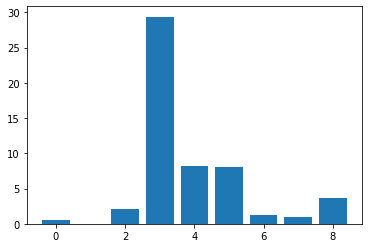

In [18]:
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

### Tying this together with the data preparation for the breast cancer dataset in the previous section, the complete example is listed below.

Feature 0: 0.472553
Feature 1: 0.029193
Feature 2: 2.137658
Feature 3: 29.381059
Feature 4: 8.222601
Feature 5: 8.100183
Feature 6: 1.273822
Feature 7: 0.950682
Feature 8: 3.699989


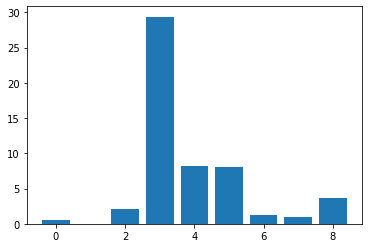

In [21]:
# example of chi squared feature selection for categorical data
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot

# load the dataset
def load_dataset(filename):
    # load the dataset as a pandas DataFrame
    data = read_csv(filename, header=None)
    # retrieve numpy array
    dataset = data.values
    # split into input (X) and output (y) variables
    X = dataset[:, :-1]
    y = dataset[:,-1]
    # format all fields as string
    X = X.astype(str)
    return X, y

# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# load the dataset
X, y = load_dataset('data/breast-cancer.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

#### Running the example first prints the scores calculated for each input feature and the target variable.

#### **Note:** your specific results may differ. Try running the example a few times.

#### In this case, we can see the scores are small and it is hard to get an idea from the number alone as to which features are more relevant.

#### Perhaps features 3, 4, 5, and 8 are most relevant.

#### A **bar chart** of the feature importance scores for each input feature is created.

#### This clearly shows that feature 3 might be the most relevant (according to chi-squared) and that perhaps four of the nine input features are the most relevant.

#### We could set k=4 When configuring the SelectKBest to select these top four features.



### **Example Chi-Squared Test**

In [20]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
table = [[10, 20, 30],
         [6,  9,  17]]
print(table)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

[[10, 20, 30], [6, 9, 17]]
dof=2
[[10.43478261 18.91304348 30.65217391]
 [ 5.56521739 10.08695652 16.34782609]]
probability=0.950, critical=5.991, stat=0.272
Independent (fail to reject H0)
significance=0.050, p=0.873
Independent (fail to reject H0)
